# Lab 9: Linear regression


## Simple linear regression

### Simulating linear regression data

In [1]:
x = rnorm(100, mean=3, sd=1)
error = rnorm(100, mean=0, sd=2)
y = 2.1+1.25*x+error

data=data.frame(cbind(x,y))

### Fitting the linear regression model

In [2]:
result = lm(data$y~data$x)
summary(result)


Call:
lm(formula = data$y ~ data$x)

Residuals:
   Min     1Q Median     3Q    Max 
-4.890 -1.373  0.100  1.116  5.421 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1555     0.6606   3.263  0.00152 ** 
data$x        1.2578     0.2051   6.134 1.82e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.025 on 98 degrees of freedom
Multiple R-squared:  0.2774,	Adjusted R-squared:   0.27 
F-statistic: 37.62 on 1 and 98 DF,  p-value: 1.816e-08


### Residual plot

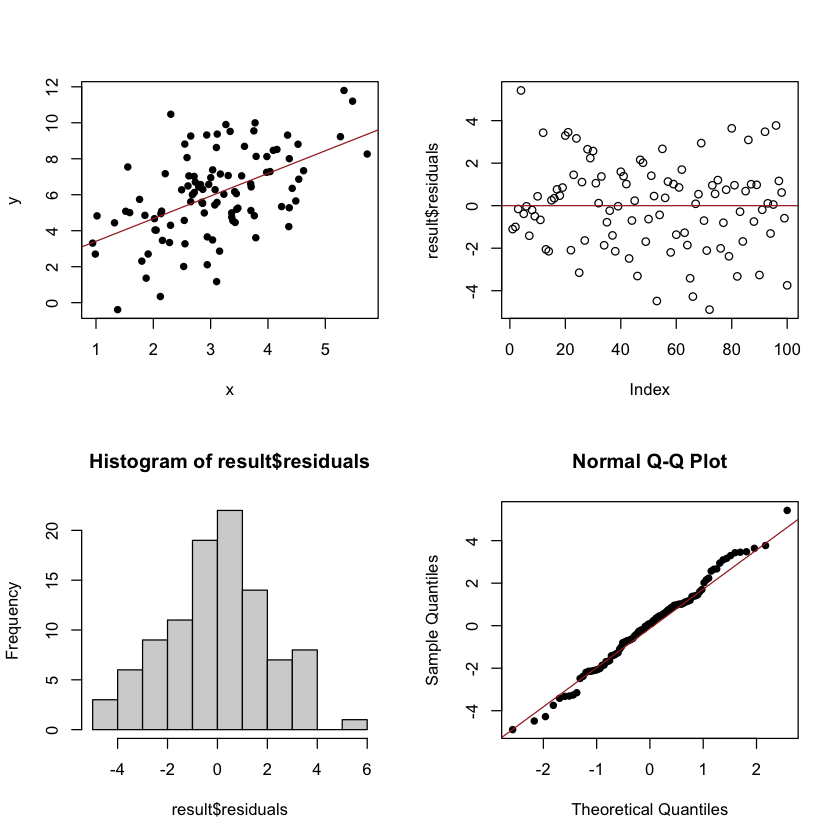

In [3]:
par(mfrow=c(2,2))
plot(x,y,pch=16)
abline(result,col="brown")
plot(result$residuals)
abline(a=0,b=0, col="brown")
hist(result$residuals)
qqnorm(result$residuals, pch=16)
qqline(result$residuals, col = "brown")

### Checking normality

In [4]:
shapiro.test(result$residuals)


	Shapiro-Wilk normality test

data:  result$residuals
W = 0.99151, p-value = 0.7843


### Prediction for new observations

In [5]:
x_new = 0.7
y_new = result$coefficients[1]+result$coefficients[2]*x_new
y_new

(Intercept) 
   3.035969

### Fitting quadratic relationships

In [6]:
x = rnorm(100, mean=0, sd=1)
y = 2.1+1.25*x^2+error
data=data.frame(cbind(x,y))
result = lm(data$y~data$x)
summary(result)


Call:
lm(formula = data$y ~ data$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0868 -1.5974 -0.0549  1.5414  6.8582 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0766     0.2319  13.269   <2e-16 ***
data$x        0.3936     0.2683   1.467    0.146    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.305 on 98 degrees of freedom
Multiple R-squared:  0.02149,	Adjusted R-squared:  0.0115 
F-statistic: 2.152 on 1 and 98 DF,  p-value: 0.1456


## Multiple linear regression
### Generating data

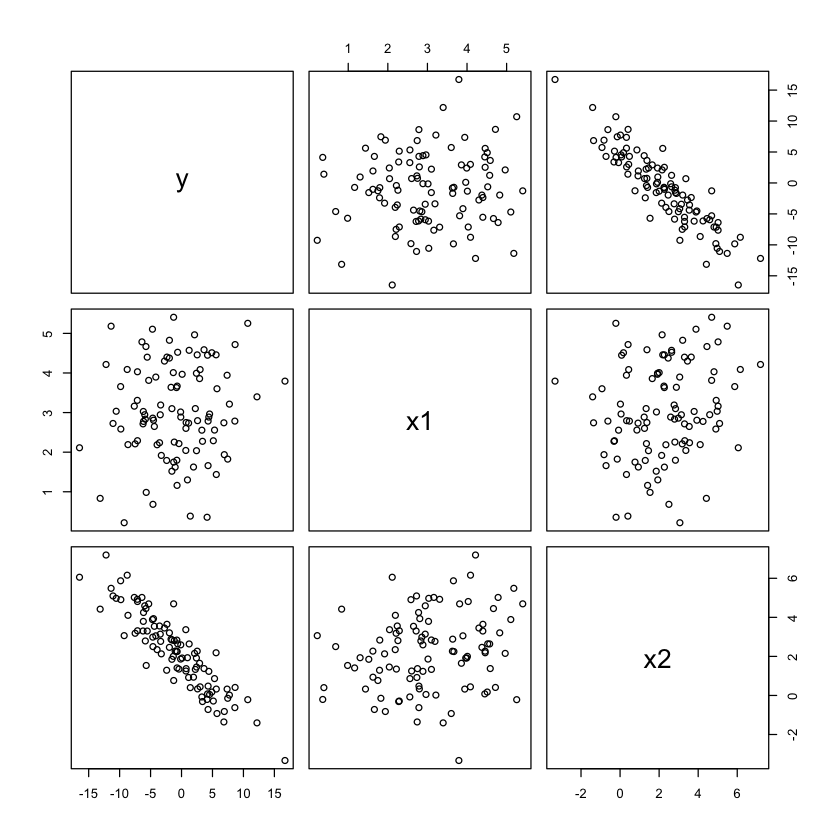

In [7]:
x1 = rnorm(100, mean=3, sd=1)
x2 = rnorm(100, mean=2.5, sd=2.1)

error = rnorm(100, mean=0, sd=2)
y = 2.1 + 1.25*x1 - 3*x2 + error

data=data.frame(cbind(y,x1,x2))
plot(data)

### Fitting the model

In [8]:
result = lm(y~x1+x2,data=data)
summary(result)


Call:
lm(formula = y ~ x1 + x2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0608 -1.5859  0.1187  1.5717  6.2167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.4783     0.5721   2.584   0.0113 *  
x1            1.3337     0.1737   7.679 1.28e-11 ***
x2           -2.8885     0.1066 -27.092  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.038 on 97 degrees of freedom
Multiple R-squared:  0.8841,	Adjusted R-squared:  0.8817 
F-statistic: 369.9 on 2 and 97 DF,  p-value: < 2.2e-16


### Residual plot

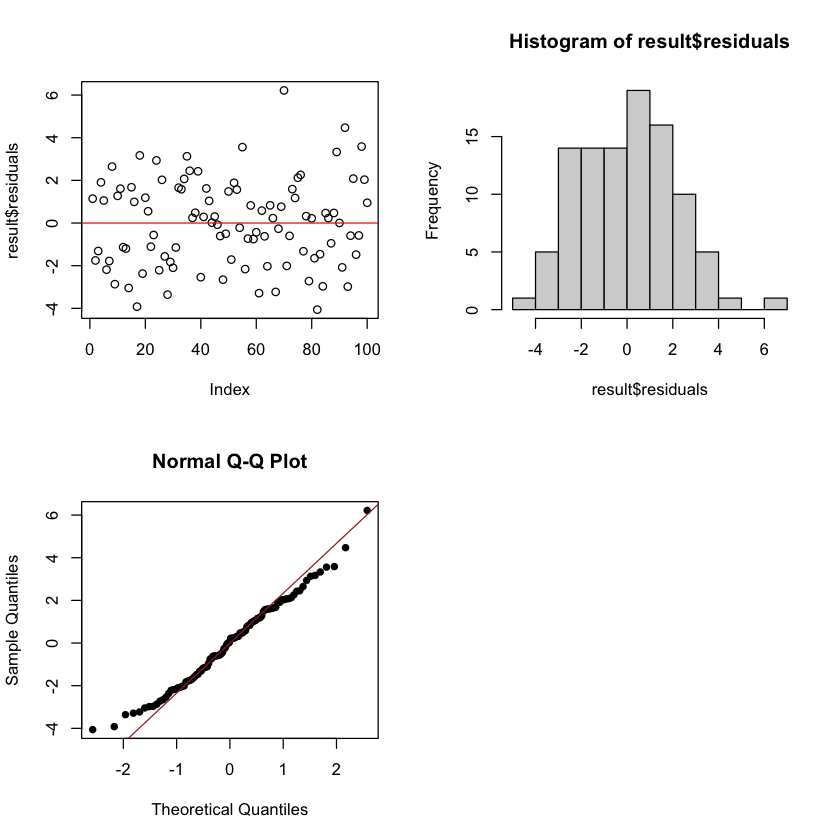

In [9]:
par(mfrow=c(2,2))
plot(result$residuals)
abline(a=0,b=0, col="red")
hist(result$residuals)
qqnorm(result$residuals, pch=16)
qqline(result$residuals, col = "brown")

### Checking the normality assumption

In [10]:
shapiro.test(result$residuals)


	Shapiro-Wilk normality test

data:  result$residuals
W = 0.98752, p-value = 0.4737


## Logistic regression
### Generating data

In [11]:
age <- round(runif(100, 18, 80))
log_odds = -2.2 + 0.02*age
p = 1/(1 + exp(-log_odds))
y <- rbinom(n = 100, size = 1, prob = p)

### Fitting the logistic model

In [12]:
mod <- glm(y ~ age, family = "binomial")
summary(mod)


Call:
glm(formula = y ~ age, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0815  -0.8989  -0.7536   1.3306   1.8374  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.87420    0.71534  -2.620  0.00879 **
age          0.02055    0.01274   1.613  0.10680   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 123.82  on 99  degrees of freedom
Residual deviance: 121.14  on 98  degrees of freedom
AIC: 125.14

Number of Fisher Scoring iterations: 4
